### Simple Model for Prdicting the COVID-19 test result or possibility of COVID infection with the given data.

We will be using a dataset of simple covid-19 based attributes. The dataset is simple with alphanumeric values..
<br></br>
Let's start with importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Loading Raw Data and converting it to a cleaned data

In [2]:
data = pd.read_csv('../input/corona-symptoms-datasets/corona_tested_individuals_ver_006.english.csv')

In [3]:
data.head()

,test_date,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,2020-04-30,0,0,0,0,0,negative,None,female,Other
1,2020-04-30,1,0,0,0,0,negative,None,female,Other
2,2020-04-30,0,1,0,0,0,negative,None,male,Other
3,2020-04-30,1,0,0,0,0,negative,None,female,Other
4,2020-04-30,1,0,0,0,0,negative,None,male,Other


In [4]:
data.shape

(278848, 10)

In [5]:
data.columns

Index(['test_date', 'cough', 'fever', 'sore_throat', 'shortness_of_breath',
       'head_ache', 'corona_result', 'age_60_and_above', 'gender',
       'test_indication'],
      dtype='object')

Here, test data is not crucial for prediction, so we remove the columns which don't contribute to the prediction model anyhow...
So, here we remove the date based column which was just the date of testing.


In [6]:
# drop test-date column
data.drop('test_date',axis=1,inplace=True)

In [7]:
# drop all values of each column which are not digit
data = data[data['cough'].apply(lambda x: str(x).isdigit())]
data = data[data['fever'].apply(lambda x: str(x).isdigit())]
data = data[data['sore_throat'].apply(lambda x: str(x).isdigit())]
data = data[data['shortness_of_breath'].apply(lambda x: str(x).isdigit())]
data = data[data['head_ache'].apply(lambda x: str(x).isdigit())]

# final_data is our main data
final_data = data

In [8]:
final_data.shape

(278594, 9)

We can see now the shape is 278594 rows to 9 columns.
<br></br>
Let's see what other patterns we can get from the dataset, Lets perform EDA... 

### EDA

Getting to know Data

In [9]:
display("Data to deal", final_data.head())

'Data to deal'

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,negative,None,female,Other
1,1,0,0,0,0,negative,None,female,Other
2,0,1,0,0,0,negative,None,male,Other
3,1,0,0,0,0,negative,None,female,Other
4,1,0,0,0,0,negative,None,male,Other


In [10]:
#size of Data
display("Shape of dataset")
print("Rows:",final_data.shape[0],"\nColumns:",final_data.shape[1])

'Shape of dataset'

Rows: 278594 
Columns: 9


In [11]:
#checking for the Null values
display('NULL Values', final_data.isnull().sum())

'NULL Values'

cough                  0
fever                  0
sore_throat            0
shortness_of_breath    0
head_ache              0
corona_result          0
age_60_and_above       0
gender                 0
test_indication        0
dtype: int64

Thus we get to knew that there is no null value, so the data is clean...

In [12]:
display("Description",final_data.describe())

'Description'

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
count,278594,278594,278594,278594,278594,278594,278594,278594,278594
unique,4,4,4,4,4,3,3,3,3
top,0,0,0,0,0,negative,None,female,Other
freq,121649,133941,260423,260838,259841,260008,127315,130030,242504


In [13]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278594 entries, 0 to 278847
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cough                278594 non-null  object
 1   fever                278594 non-null  object
 2   sore_throat          278594 non-null  object
 3   shortness_of_breath  278594 non-null  object
 4   head_ache            278594 non-null  object
 5   corona_result        278594 non-null  object
 6   age_60_and_above     278594 non-null  object
 7   gender               278594 non-null  object
 8   test_indication      278594 non-null  object
dtypes: object(9)
memory usage: 21.3+ MB


In [14]:
#checking Distrubution of Data
for i in final_data.columns:
    print("\nColumn Name:",i,5*":",final_data[i].unique(),5*":","Unique Count",len(final_data[i].unique()))


Column Name: cough ::::: [0 1 '0' '1'] ::::: Unique Count 4

Column Name: fever ::::: [0 1 '0' '1'] ::::: Unique Count 4

Column Name: sore_throat ::::: [0 1 '0' '1'] ::::: Unique Count 4

Column Name: shortness_of_breath ::::: [0 1 '0' '1'] ::::: Unique Count 4

Column Name: head_ache ::::: [0 1 '0' '1'] ::::: Unique Count 4

Column Name: corona_result ::::: ['negative' 'positive' 'other'] ::::: Unique Count 3

Column Name: age_60_and_above ::::: ['None' 'Yes' 'No'] ::::: Unique Count 3

Column Name: gender ::::: ['female' 'male' 'None'] ::::: Unique Count 3

Column Name: test_indication ::::: ['Other' 'Abroad' 'Contact with confirmed'] ::::: Unique Count 3


In [15]:
# convert data types of column stated in convert_dict
convert_dict = {'cough': int, 
                'fever': int, 
                'sore_throat': int, 
                'shortness_of_breath': int, 
                'head_ache': int}
final_data = final_data.astype(convert_dict)

In [16]:
for i in final_data.columns:
    print("\nColumn Name:",i,5*":",final_data[i].unique(),5*":","Unique Count",len(final_data[i].unique()))


Column Name: cough ::::: [0 1] ::::: Unique Count 2

Column Name: fever ::::: [0 1] ::::: Unique Count 2

Column Name: sore_throat ::::: [0 1] ::::: Unique Count 2

Column Name: shortness_of_breath ::::: [0 1] ::::: Unique Count 2

Column Name: head_ache ::::: [0 1] ::::: Unique Count 2

Column Name: corona_result ::::: ['negative' 'positive' 'other'] ::::: Unique Count 3

Column Name: age_60_and_above ::::: ['None' 'Yes' 'No'] ::::: Unique Count 3

Column Name: gender ::::: ['female' 'male' 'None'] ::::: Unique Count 3

Column Name: test_indication ::::: ['Other' 'Abroad' 'Contact with confirmed'] ::::: Unique Count 3


# Plot


<AxesSubplot:xlabel='corona_result', ylabel='count'>

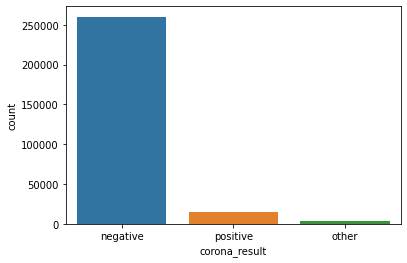

In [17]:
# frequency plot of corona_result
sns.countplot(final_data['corona_result'])

The results show that its not that prominent that the result is positive all the time, rather insterestingly its negetive maximum time.

<AxesSubplot:xlabel='fever', ylabel='corona_result'>

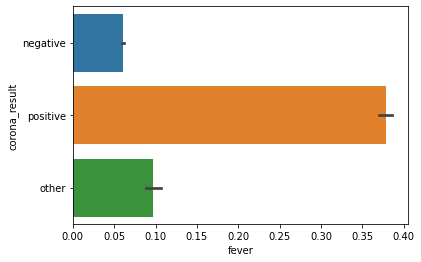

In [18]:
# target(corona_result) v/s feature plots
sns.barplot(final_data['fever'], final_data['corona_result'])

Here we can see that fever contributes to fair amount of possibility of postive result of COVID 19 giving the insight that it is one of the major factor.

<AxesSubplot:xlabel='shortness_of_breath', ylabel='corona_result'>

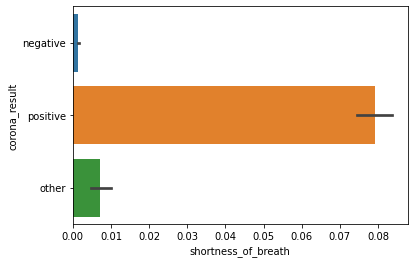

In [19]:
sns.barplot(final_data['shortness_of_breath'], final_data['corona_result'])

Shortness of breathing provides a strong response here. We can see that the positiveness of the test is majorly affected by the attribute of breathlessness

**Preproccesing** the dataset as some of them are not in numerical value and eventually also we need numerical value for tarining the model...

In [20]:
# label encoding on columns having more than 1 value
le = preprocessing.LabelEncoder()
final_data['corona_result'] = le.fit_transform(final_data['corona_result'])
final_data['gender'] = le.fit_transform(final_data['gender'])
final_data['age_60_and_above'] = le.fit_transform(final_data['age_60_and_above'])
final_data['test_indication'] = le.fit_transform(final_data['test_indication'])

In [21]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,0,1,1,2
2,0,1,0,0,0,0,1,2,2
3,1,0,0,0,0,0,1,1,2
4,1,0,0,0,0,0,1,2,2


Here we can see the table is well numerical placed...

In [22]:
for i in final_data.columns:
    print("\nColumn Name:",i,"-->",final_data[i].unique(),"-->Unique Count",len(final_data[i].unique()))


Column Name: cough --> [0 1] -->Unique Count 2

Column Name: fever --> [0 1] -->Unique Count 2

Column Name: sore_throat --> [0 1] -->Unique Count 2

Column Name: shortness_of_breath --> [0 1] -->Unique Count 2

Column Name: head_ache --> [0 1] -->Unique Count 2

Column Name: corona_result --> [0 2 1] -->Unique Count 3

Column Name: age_60_and_above --> [1 2 0] -->Unique Count 3

Column Name: gender --> [1 2 0] -->Unique Count 3

Column Name: test_indication --> [2 0 1] -->Unique Count 3


## Model

In [23]:
final_data.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,corona_result,age_60_and_above,gender,test_indication
0,0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,0,1,1,2
2,0,1,0,0,0,0,1,2,2
3,1,0,0,0,0,0,1,1,2
4,1,0,0,0,0,0,1,2,2


In [24]:
# now target is y and features in X
y = final_data['corona_result']
X = final_data.drop(['corona_result'], axis = 1)

In [25]:
X.head()

,cough,fever,sore_throat,shortness_of_breath,head_ache,age_60_and_above,gender,test_indication
0,0,0,0,0,0,1,1,2
1,1,0,0,0,0,1,1,2
2,0,1,0,0,0,1,2,2
3,1,0,0,0,0,1,1,2
4,1,0,0,0,0,1,2,2


In [26]:
# Splitting the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

Spiltting is a very crucial step if you want to test your model rightaway. Using what we have as in the datset inself, we can compare if the resulted predicted value is close to the value already present in the dataset. 
</br>
Thus we can see if our model works in short...

### K-Nearest Neighbors

In [27]:
# this will be used to plot accuracy of different alogrithms
scores_dict = {}

In [28]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2 )  
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [29]:
pred = classifier.predict(X_test) 
accuracy_knn = accuracy_score(y_test, pred)
print("KNN accuracy_score: ", accuracy_knn)
scores_dict['K-NearestNeighbors'] = accuracy_knn * 100

KNN accuracy_score:  0.9545397440729374


### Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

In [30]:
RandomForest = RandomForestClassifier()
RandomForest = RandomForest.fit(X_train, y_train)
predRandomForest = RandomForest.predict(X_test)
accuracy_rf = accuracy_score(y_test, predRandomForest)
print('RandomForest accuracy_score: ', accuracy_rf)
scores_dict['RandomForestClassifier'] = accuracy_rf * 100

RandomForest accuracy_score:  0.9567472495917012


<AxesSubplot:xlabel='corona_result', ylabel='Density'>

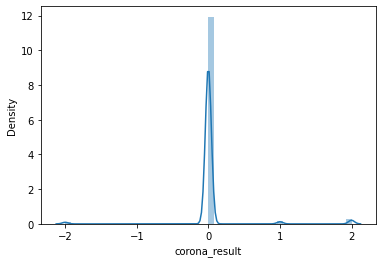

In [31]:
sns.distplot(y_test-pred)

### Decision Tree Classifier

In [32]:
DecisionTree = DecisionTreeClassifier()
DecisionTree = DecisionTree.fit(X_train, y_train)
pred = DecisionTree.predict(X_test)
accuracy_dt = accuracy_score(y_test, pred)
print('DecisionTree accuracy_score: ', accuracy_dt)
scores_dict['DecisionTreeClassifier'] = accuracy_dt * 100

DecisionTree accuracy_score:  0.9565857247976454


Let's compare

In [33]:
scores_dict

{'K-NearestNeighbors': 95.45397440729374,
 'RandomForestClassifier': 95.67472495917012,
 'DecisionTreeClassifier': 95.65857247976453}

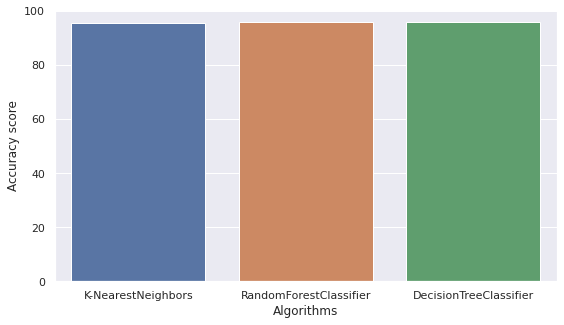

In [34]:
with sns.color_palette('muted'):
  algo_name = list(scores_dict.keys())
  scoress = list(scores_dict.values())

  sns.set(rc={'figure.figsize':(9,5)})
  plt.xlabel("Algorithms")
  plt.ylabel("Accuracy score")

  sns.barplot(algo_name,scoress)

Which is almost similarly high, as we can see...